### Name
AmirReza Azari
### StudentId
99101087


# Librarires

In [1]:
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans as SklearnKMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [3]:
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None    
    
    def predict(self, X):
        return self.assign_labels(X)
    
    def calculate_centroids(self, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points = X[self.labels == i]
            if points.size:
                centroids[i] = points.mean(axis=0)
        return centroids
    
    def assign_labels(self, X):
        labels = []
        for x in X:
            label = np.argmin(np.linalg.norm(x - self.centroids, axis=1))
            labels.append(label)
        return np.array(labels)
    
    def fit(self, X):
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]
        for k in range(self.max_iter):
            self.labels = self.assign_labels(X)
            new_centroids = self.calculate_centroids(X)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

# Use elbow method and silhouette method to choose optimal cluster numbers

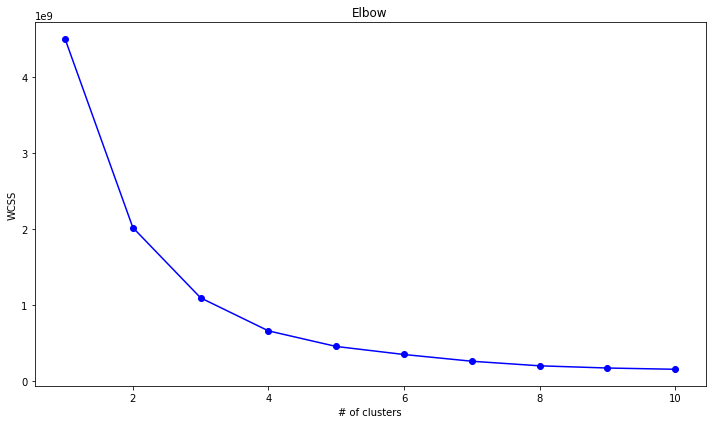

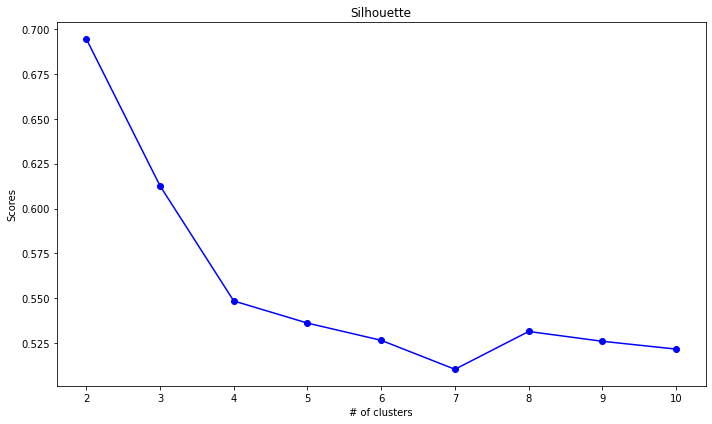

In [4]:
def calculate_wcss(X, kmeans):
    wcss = 0
    for i in range(len(X)):
        centroid = kmeans.centroids[kmeans.labels[i]]
        wcss += np.linalg.norm(X[i] - centroid) ** 2
    return wcss

def elbow():
    wcss = []
    for k in range(1, 11):
        kmeans_scratch = KMeans(n_clusters=k)
        kmeans_scratch.fit(x_data)
        wcss.append(calculate_wcss(x_data, kmeans_scratch))
    return wcss

def cscores():
    scores = []
    for k in range(2, 11):
        kmeans_scratch = KMeans(n_clusters=k)
        kmeans_scratch.fit(x_data)
        cluster_labels = kmeans_scratch.predict(x_data)
        scores.append(silhouette_score(x_data, cluster_labels))
    return scores

def plotting(list_data, start):
    plt.figure(figsize=(10, 6))
    plt.plot(range(start, 11), list_data, 'bo-')
    if start == 1:
        plt.xlabel('# of clusters')
        plt.ylabel('WCSS')
        plt.title('Elbow')
    if start == 2:
        plt.xlabel('# of clusters')
        plt.ylabel('Scores')
        plt.title('Silhouette')
    plt.tight_layout()
    plt.show()

wcss = []
wcss = elbow()
scores = []
scores = cscores()
plotting(wcss, 1)
plotting(scores, 2)

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

C:\Users\Amir Reza 81\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Amir Reza 81\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Amir Reza 81\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Amir Reza 81\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Amir Reza 81\anacon

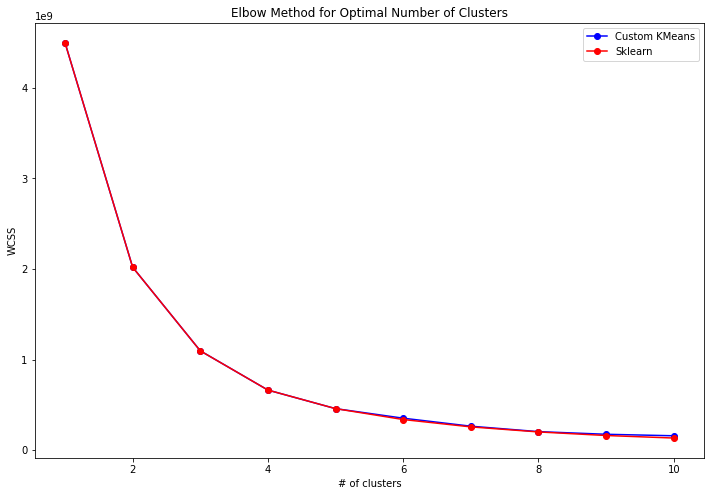

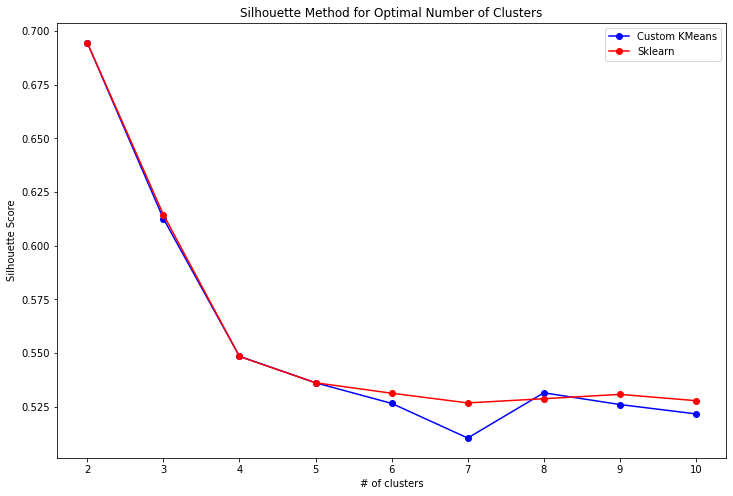

In [5]:
wcss_sklearn = []
for k in range(1, 11):
    kmeans_sklearn = SklearnKMeans(n_clusters=k, random_state=0)
    kmeans_sklearn.fit(x_data)
    wcss_sklearn.append(kmeans_sklearn.inertia_)

    
scores_sklearn = []
for k in range(2, 11):
    kmeans_sklearn = SklearnKMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans_sklearn.fit_predict(x_data)
    scores_sklearn.append(silhouette_score(x_data, cluster_labels))

    
def plotting(list_data1, list_data2, start):
    plt.figure(figsize=(12, 8))
    plt.plot(range(start, 11), list_data1, 'bo-', label='Custom KMeans')
    plt.plot(range(start, 11), list_data2, 'ro-', label='Sklearn')
    if start == 1:
        plt.xlabel('# of clusters')
        plt.ylabel('WCSS')
        plt.title('Elbow Method for Optimal Number of Clusters')
    elif start == 2:
        plt.xlabel('# of clusters')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Method for Optimal Number of Clusters')
    plt.legend()
    plt.show()
    
plotting(wcss, wcss_sklearn, 1)
plotting(scores, scores_sklearn, 2)

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

```
The optimal number of clusters in custome kmeans is diffrent based on each algorithm.
In the elbow method, the optimal cluster number in both custom and sklearn algorithm is same and 3
In the silhouette method, the optimal cluster number in both custom and sklearn algorithm is 4.
```
```
The difference arises because the Elbow Method prioritizes the reduction in WCSS, focusing on the tightness within clusters. Conversely, the Silhouette Method takes into account both compactness and separation, evaluating how well each point matches its own cluster compared to others. The custom KMeans and sklearn KMeans algorithms deliver similar outcomes.
```

```
The Silhouette Method assesses clustering quality by measuring how similar each point is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.
Silhouette scores peak at 2 clusters for both methods, with scores decreasing as the number of clusters increases, indicating that the initial clusters are well-defined.
Optimal Clusters (Silhouette Method): 2 clusters based on the peak silhouette scores.
```
Summery:
```
Elbow Method: Suggests 3 or 4 clusters as optimal where the distortion curve starts to flatten.
Silhouette Method: Indicates 2 clusters as the optimal number based on peak silhouette scores.
```

### would you prefer elbow method for determining optimal cluster number or silhouette method?

 I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method
``` 
- Nature of Data:<br> For simple datasets where the number of clusters is expected to be clear and distinct, the elbow method can be quite effective and quick. However, for more complex datasets where clusters might not be well-separated, the silhouette method can provide a more reliable and interpretable measure.<br>
- Computational Resources:<br> If computational resources are limited and the dataset is large, the elbow method might be preferable due to its lower computational cost compared to the silhouette method.<br>
- Clarity and Precision:<br> If a more precise and objective measure is required, the silhouette method is generally more robust as it quantitatively assesses the quality of clustering.
```

```
If forced to choose one, the silhouette method would often be preferable due to its quantitative assessment and interpretability. However, the best approach is to consider the specific context and potentially use both methods together for the most reliable determination of the optimal number of clusters.
```